# Part I - (Exploratory Data Analysis of Prosper Loan Dataset)
## by (Precious Raman)

## Introduction
> This notebook will document my efforts to investigate a dataset with central focus on loans from the Prosper peer-to-peer lending platform and create visualizations to explain hidden relationships. 
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrowers' rate (or interest rate), current loan status, borrowers' income, and many others.

>Data dictionary for better understanding of the variables are in this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0.









## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read dataset into pandas dataframe using read_csv and examine the descriptions
loan_df = pd.read_csv('prosperLoanData.csv')


loan_df.shape

(113937, 81)

In [3]:
# accessing dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# accessing data
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# write a function to check the percentages of null values

def nullV() :  
    y = loan_df.isnull().sum()
    for i in range(len(y)) :
        if y[i] != 0 :
            x= y[i] 
            col = loan_df.columns[i]
            z= (x/loan_df.shape[0])*100
            print(str(i) + " - " + col + " - " + str(x) + " nulls -"+ str(round(z,2)) +"%")
nullV()    

3 - CreditGrade - 84984 nulls -74.59%
6 - ClosedDate - 58848 nulls -51.65%
7 - BorrowerAPR - 25 nulls -0.02%
10 - EstimatedEffectiveYield - 29084 nulls -25.53%
11 - EstimatedLoss - 29084 nulls -25.53%
12 - EstimatedReturn - 29084 nulls -25.53%
13 - ProsperRating (numeric) - 29084 nulls -25.53%
14 - ProsperRating (Alpha) - 29084 nulls -25.53%
15 - ProsperScore - 29084 nulls -25.53%
17 - BorrowerState - 5515 nulls -4.84%
18 - Occupation - 3588 nulls -3.15%
19 - EmploymentStatus - 2255 nulls -1.98%
20 - EmploymentStatusDuration - 7625 nulls -6.69%
23 - GroupKey - 100596 nulls -88.29%
25 - CreditScoreRangeLower - 591 nulls -0.52%
26 - CreditScoreRangeUpper - 591 nulls -0.52%
27 - FirstRecordedCreditLine - 697 nulls -0.61%
28 - CurrentCreditLines - 7604 nulls -6.67%
29 - OpenCreditLines - 7604 nulls -6.67%
30 - TotalCreditLinespast7years - 697 nulls -0.61%
33 - InquiriesLast6Months - 697 nulls -0.61%
34 - TotalInquiries - 1159 nulls -1.02%
35 - CurrentDelinquencies - 697 nulls -0.61%
36 - A

##### Define (1): Drop all non-needed variables with more than 50% null values

##### Code:

In [6]:
loan_df.drop(columns=["TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments"],inplace= True )

##### Test:

In [7]:
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

##### Define (2): Remove all unique values (ListingKey, ListingNumber, GroupKey, LoanKey, LoanNumber, MemberKey) that are not useful

##### Code:

In [8]:
loan_df.drop(columns = ['ListingKey', 'ListingNumber', 'GroupKey', 'LoanKey', 'LoanNumber', 'MemberKey'], inplace = True)

##### Test:

In [9]:
loan_df.columns =='ListingKey' 
loan_df.columns =='ListingNumber' 
loan_df.columns =='GroupKey' 
loan_df.columns =='LoanKey' 
loan_df.columns =='LoanNumber'
loan_df.columns =='MemberKey'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

##### Define (3): Fill all NaN values in Borrowers APR column 

##### Code:

In [10]:
# Since APR equals Brrowers rate plus fees, calculate fees and find mean.
borrower_fees = loan_df['BorrowerAPR'] - loan_df['BorrowerRate']
fees_mean = borrower_fees.mean()

In [11]:
# fill null values
loan_df['BorrowerAPR'].fillna((loan_df['BorrowerRate'] + fees_mean), inplace = True)

##### Test:

In [12]:
# test wrangled data
loan_df['BorrowerAPR'].isnull().sum()

0

##### Define (4): Fill null values in debt to income ratio column

##### Code:

In [13]:
# calculate the mean for the debt to income ratio column
DTIR = loan_df['DebtToIncomeRatio'].mean()

# fill null values
loan_df['DebtToIncomeRatio'].fillna(DTIR, inplace = True)

##### Test:

In [14]:
# test wrangled data
loan_df["DebtToIncomeRatio"].isnull().sum()

0

##### Define (5): Drop records with null values using needed columns as subsets

##### Code: 

In [15]:
# drop 
loan_df.dropna(subset=[ 'Occupation','BorrowerState','CurrentDelinquencies',"CreditScoreRangeLower", 'OpenCreditLines'], inplace=True)

##### Test:

In [16]:
# check for null values in the dataset
nullV() 

1 - CreditGrade - 83651 nulls -81.02%
4 - ClosedDate - 57528 nulls -55.72%
8 - EstimatedEffectiveYield - 19724 nulls -19.1%
9 - EstimatedLoss - 19724 nulls -19.1%
10 - EstimatedReturn - 19724 nulls -19.1%
11 - ProsperRating (numeric) - 19724 nulls -19.1%
12 - ProsperRating (Alpha) - 19724 nulls -19.1%
13 - ProsperScore - 19724 nulls -19.1%
18 - EmploymentStatusDuration - 17 nulls -0.02%


##### Define (6): Convert date variables to datetime and split by day, month and year

In [17]:
# convert columns from 'object' datatype to 'datetime'
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])
loan_df['ClosedDate'] = pd.to_datetime(loan_df['ClosedDate'])

# split variables into day, month and year
loan_df['ListingDay'] = loan_df['ListingCreationDate'].dt.day
loan_df['ListingMonth'] = loan_df['ListingCreationDate'].dt.month_name()
loan_df['ListingYear'] = loan_df['ListingCreationDate'].dt.year
loan_df['OriginationDay'] = loan_df['LoanOriginationDate'].dt.day
loan_df['OriginationMonth'] = loan_df['LoanOriginationDate'].dt.month_name()
loan_df['OriginationYear'] = loan_df['LoanOriginationDate'].dt.year
loan_df['ClosedDay'] = loan_df['ClosedDate'].dt.day
loan_df['ClosedMonth'] = loan_df['ClosedDate'].dt.month_name()
loan_df['ClosedYear'] = loan_df['ClosedDate'].dt.year
                                                        

In [18]:
loan_df.columns

Index(['ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
       'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       '

##### Define (7): Replace the numeric values in proper rating (numeric), then rename column

##### Code:

In [19]:
# replace numeric values using the replace() method
loan_df['ProsperRating (numeric)'].replace(to_replace = [0,1,2,3,4,5,6,7], value = ['N/A', 'HR', 'E', 'D', 'C','B', 'A', 'AA'], inplace = True)

# rename the column
loan_df.rename(columns = {'ProsperRating (numeric)':'ProsperRating'}, inplace = True)

##### Test:

In [20]:
# test wrangled data
loan_df['ProsperRating'].value_counts()

C     17956
B     15329
A     14337
D     14081
E      9621
HR     6878
AA     5318
Name: ProsperRating, dtype: int64

##### Define (8): Replace the numeric values in ListingCategory(numeric), then rename column

In [21]:
# replace values in the ListingCategory(numeric) column
loan_df['ListingCategory (numeric)'].replace(to_replace=[0,1,2,3,4,5,6,7,8, 9, 10,11,12,13,14,15,16,17,18,19,20],
                                        value=['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
                                               'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure',
                                               'Engagement Ring','Green Loans','Household Expenses','Large Purchases',
                                               'Medical/Dental','Motorcycle,','RV','Taxes','Vacation','Wedding Loans'],inplace=True)
# rename the column
loan_df.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

##### Test:

In [22]:
# test wrangled data
loan_df['ListingCategory'].value_counts()

Debt Consolidation    57185
Other                 10395
Not Available          7651
Home Improvement       7391
Business               7177
Auto                   2558
Personal Loan          2380
Household Expenses     1975
Medical/Dental         1500
Taxes                   880
Large Purchases         865
Wedding Loans           769
Vacation                758
Student Use             755
Motorcycle,             304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       51
Name: ListingCategory, dtype: int64

##### Define (9): Convert some columns with object data type to ordinal categories

##### Code:

In [23]:
# convert Prosper Rating to ordinal categories
ordinal_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA']}
for var in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

##### Test:

In [24]:
# test wrangled data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103244 entries, 0 to 113936
Data columns (total 75 columns):
ListingCreationDate                   103244 non-null datetime64[ns]
CreditGrade                           19593 non-null object
Term                                  103244 non-null int64
LoanStatus                            103244 non-null object
ClosedDate                            45716 non-null datetime64[ns]
BorrowerAPR                           103244 non-null float64
BorrowerRate                          103244 non-null float64
LenderYield                           103244 non-null float64
EstimatedEffectiveYield               83520 non-null float64
EstimatedLoss                         83520 non-null float64
EstimatedReturn                       83520 non-null float64
ProsperRating                         83520 non-null category
ProsperRating (Alpha)                 83520 non-null object
ProsperScore                          83520 non-null float64
ListingCategory    

##### Define (10): Drop columns not needed for visualization

##### Code:

In [25]:
# Drop columns not needed in further visualization
loan_df.drop(columns = ['ListingCreationDate','StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginationDate', 'ClosedDate','AmountDelinquent', 'LoanMonthsSinceOrigination', 'LoanCurrentDaysDelinquent', 'FirstRecordedCreditLine', 'EstimatedEffectiveYield', 'EstimatedLoss',
                       'EstimatedReturn', 'ProsperRating (Alpha)', 'CurrentlyInGroup', 'DateCreditPulled',
                       'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'BankcardUtilization',
                       'PublicRecordsLast12Months', 'ProsperScore', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
                       'TradesOpenedLast6Months', 'IncomeVerifiable', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
                       'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
                       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount',
                       'InvestmentFromFriendsAmount', 'RevolvingCreditBalance','Investors', 'EmploymentStatusDuration','OpenCreditLines',
                       'OpenRevolvingAccounts','AvailableBankcardCredit','OpenRevolvingMonthlyPayment','TotalCreditLinespast7years', 'TotalInquiries',  'InquiriesLast6Months'], inplace = True )

##### Test:

In [26]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103244 entries, 0 to 113936
Data columns (total 29 columns):
CreditGrade               19593 non-null object
Term                      103244 non-null int64
LoanStatus                103244 non-null object
BorrowerAPR               103244 non-null float64
BorrowerRate              103244 non-null float64
LenderYield               103244 non-null float64
ProsperRating             83520 non-null category
ListingCategory           103244 non-null object
BorrowerState             103244 non-null object
Occupation                103244 non-null object
EmploymentStatus          103244 non-null object
IsBorrowerHomeowner       103244 non-null bool
CreditScoreRangeLower     103244 non-null float64
CreditScoreRangeUpper     103244 non-null float64
CurrentCreditLines        103244 non-null float64
CurrentDelinquencies      103244 non-null float64
DebtToIncomeRatio         103244 non-null float64
IncomeRange               103244 non-null object
Lo

(103244, 29)

##### Define (11): Convert other columns to suitable datatypes

##### Code:

In [27]:
# convert occupation, borrower state, loan status, listing category, and employment status to categorical columns
loan_df['Occupation'] = loan_df['Occupation'].astype('category')
loan_df['BorrowerState'] = loan_df['BorrowerState'].astype('category')
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype('category')
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype('category')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].astype('category')

##### Test:

In [28]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103244 entries, 0 to 113936
Data columns (total 29 columns):
CreditGrade               19593 non-null object
Term                      103244 non-null int64
LoanStatus                103244 non-null category
BorrowerAPR               103244 non-null float64
BorrowerRate              103244 non-null float64
LenderYield               103244 non-null float64
ProsperRating             83520 non-null category
ListingCategory           103244 non-null category
BorrowerState             103244 non-null category
Occupation                103244 non-null category
EmploymentStatus          103244 non-null category
IsBorrowerHomeowner       103244 non-null bool
CreditScoreRangeLower     103244 non-null float64
CreditScoreRangeUpper     103244 non-null float64
CurrentCreditLines        103244 non-null float64
CurrentDelinquencies      103244 non-null float64
DebtToIncomeRatio         103244 non-null float64
IncomeRange               103244 non-null

(103244, 29)

##### Define (12): Create new column 'CreditScore' and dropping CreditScoreRangeLower and CreditScoreRangeUpper columns

##### Code:

In [29]:
# create new column
loan_df['CreditScore'] = (loan_df['CreditScoreRangeUpper'] + loan_df['CreditScoreRangeLower'])/2

# drop old columns
loan_df.drop(columns =['CreditScoreRangeLower','CreditScoreRangeUpper'], inplace = True)

##### Test:

In [30]:
# test wrangled data
loan_df.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperRating', 'ListingCategory', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CurrentCreditLines', 'CurrentDelinquencies', 'DebtToIncomeRatio',
       'IncomeRange', 'LoanOriginalAmount', 'LoanOriginationQuarter',
       'ListingDay', 'ListingMonth', 'ListingYear', 'OriginationDay',
       'OriginationMonth', 'OriginationYear', 'ClosedDay', 'ClosedMonth',
       'ClosedYear', 'CreditScore'],
      dtype='object')

In [31]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103244 entries, 0 to 113936
Data columns (total 28 columns):
CreditGrade               19593 non-null object
Term                      103244 non-null int64
LoanStatus                103244 non-null category
BorrowerAPR               103244 non-null float64
BorrowerRate              103244 non-null float64
LenderYield               103244 non-null float64
ProsperRating             83520 non-null category
ListingCategory           103244 non-null category
BorrowerState             103244 non-null category
Occupation                103244 non-null category
EmploymentStatus          103244 non-null category
IsBorrowerHomeowner       103244 non-null bool
CurrentCreditLines        103244 non-null float64
CurrentDelinquencies      103244 non-null float64
DebtToIncomeRatio         103244 non-null float64
IncomeRange               103244 non-null object
LoanOriginalAmount        103244 non-null int64
LoanOriginationQuarter    103244 non-null ob

(103244, 28)

### What is the structure of your dataset?

> This dataset consists of 113937 observations with 81 attributes that convey information about loans collected within a period of 7 years from 2007 and 2014. These attributes have various datatypes which includes datetime,categorical, int64, float64, and boolean.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are borrower APR, loan origination date, loan listing date, closed date, loan status. Better understanding of these attributes will positively influence the identification of great and goal-driven decisions.
- *BorrowerAPR*: The Borrower's Annual Percentage Rate (APR) for the loan.
- *Lender's Yield*: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
- *ListingCreationDate*: The date the listing was created.
- *LoanOriginationDate*: The date the loan was originated.
- *ClosedDate*: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 
- *CurrentStatus*: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- *LoanOriginalAmount*: The origination amount of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Other features of interest are Prosper rating, Credit grade, Lender's Yield,  Debt-to-income ratio, Loan origination quarter, and Credit score. 

>Apart from the above named features, I would also be investigating some features that are not related to the main variables. This is to have an overview of the dataset and identify all hidden relationships.

## Univariate Exploration

### Question 1: Distribution of the Loan original amount?

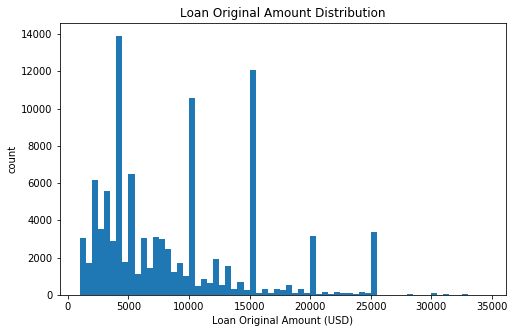

In [32]:
# univariate exploration of loan original amount column using histogram
#set bin values
bins = np.arange(1000, loan_df['LoanOriginalAmount'].max(), 500)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)

plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('count')
plt.title('Loan Original Amount Distribution');

From the above visualization, majority of the loans fall below 25000 dollars. The histogram is skewed to the right with spikes at 3500 - 4000, 10000 - 10500, 15000 - 15500, 20000 - 20500, and 25000 - 25500 respectively. 

There is however a need to apply logarithm transformation to normalize the distribution.

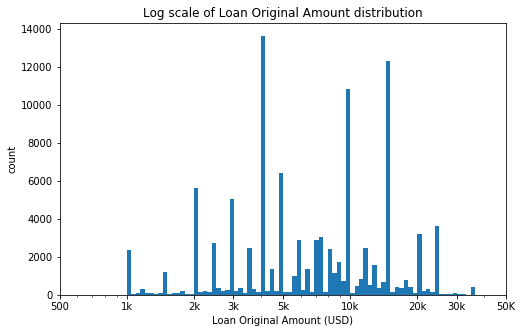

In [33]:
# log exploration of the distibution of the original loan amount

# set bins
bins = 10 ** np.arange(3, np.log10(loan_df['LoanOriginalAmount'].max())+0.02, 0.02)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'LoanOriginalAmount', bins = bins)

plt.title('Log scale of Loan Original Amount distribution')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('count');


The above visualization further buttress the known fact that many of the loans issued are below 25000 dollars.

### Question 2: Distribution of listing creation date?

###### Plot of Listing Year

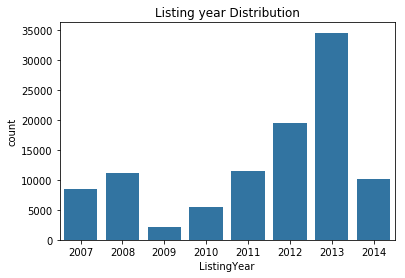

In [34]:
# create a bar chat to depict the distributon of Listing year

base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'ListingYear', color = base_color);

plt.title('Listing year Distribution');  

Majority of the loans in the provided dataset were booked in 2013, followed by 2012. There was a high decrease in loan listing in 2009, whICh started to pick up in 2010 upwards to 2013.

###### Plot of Listing Month

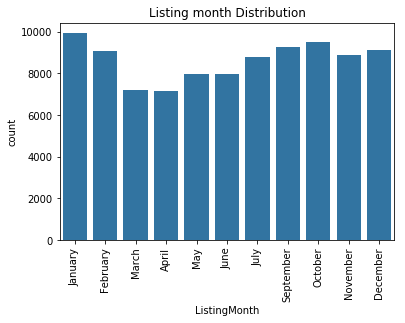

In [35]:
# create a bar chat to depict the distributon of Listing month

base_color = sb.color_palette()[0]
order = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'September', 'October', 'November', 'December']
sb.countplot(data = loan_df, x = 'ListingMonth',order = order, color = base_color);
plt.xticks(rotation = 90)

plt.title('Listing month Distribution');  

January has the highest amount of loan listings and the listings were observed to be lowest in March and April. This decrease however rose steadily towards the end of the month.

###### Plot of Listing Day

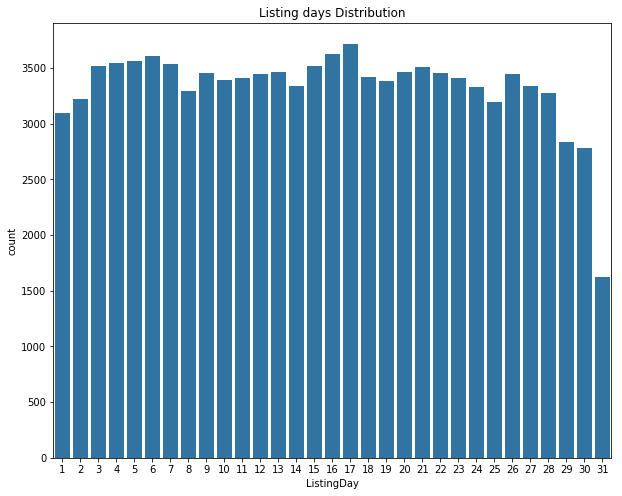

In [36]:
# create a bar chat to depict the distributon of Listing days

base_color = sb.color_palette()[0]
plt.figure(figsize = [10,8])
sb.countplot(data = loan_df, x = 'ListingDay', color = base_color);


plt.title('Listing days Distribution');  

Loan listings were lowest on the 31st of the month and highest around the middle (15-17). 

### Question 3: Distribution of loan origination date?

###### Plot of Origination Year

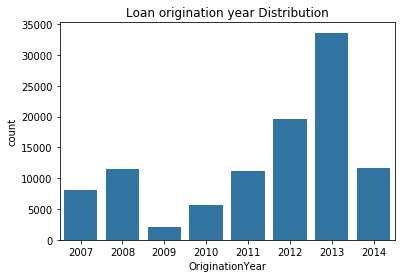

In [37]:
# create a bar chat to depict the distributon of Origination year

base_color = sb.color_palette()[0]

sb.countplot(data = loan_df, x = 'OriginationYear', color = base_color);

plt.title('Loan origination year Distribution');  

Just like the listing year, the loan origination date with the highest amount of registered loans in 2013, with the same already observed dip in 2009. What could be the cause?

###### Plot of Origination Month

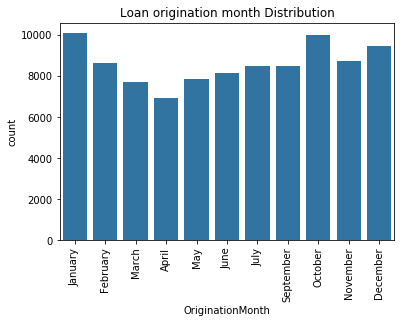

In [38]:
# create a bar chat to depict the distribution of Origination month

base_color = sb.color_palette()[0]
order = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'September', 'October', 'November', 'December']
sb.countplot(data = loan_df, x = 'OriginationMonth',order = order,
             color = base_color);
plt.xticks(rotation = 90)
plt.title('Loan origination month Distribution');  

The inference is same as listing month. There appears to be a dip in March and April, which results in an inconsistent increase towards December. January has the highest recorded loan orgination.

###### Plot of Origination day

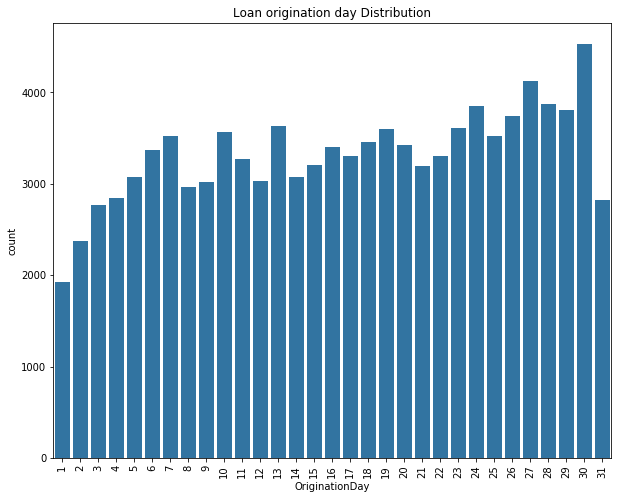

In [39]:
# create a bar chat to depict the distributon of Origination day

base_color = sb.color_palette()[0]
plt.figure(figsize = [10,8])
sb.countplot(data = loan_df, x = 'OriginationDay',
             color = base_color);
plt.xticks(rotation = 90)
plt.title('Loan origination day Distribution');  

Many loans were approved around the end of the month. This couls be an attempt by  the company nd employees to tidy up and meet performance set goals.

### Question 4: Distribution of loan closed date?

###### Plot of Closed Year

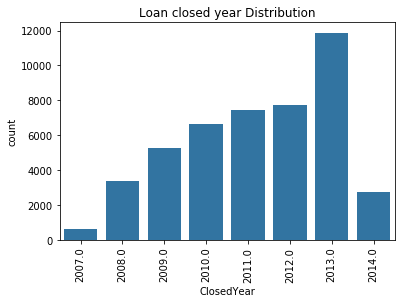

In [40]:
# create a bar chat to depict the distributon of Closed year

base_color = sb.color_palette()[0]

sb.countplot(data = loan_df, x = 'ClosedYear',
             color = base_color);
plt.xticks(rotation = 90)
plt.title('Loan closed year Distribution');  

More loans close in 2013. It is therefore understandable more loans originated in the same year.

###### Plot of Closed Month

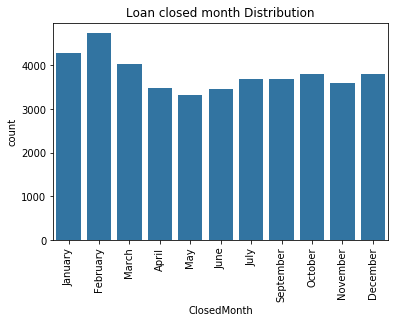

In [41]:
# create a bar chat to depict the distribution of Closed month

base_color = sb.color_palette()[0]
order = ['January', 'February', 'March', 'April', 'May', 'June',
        'July', 'September', 'October', 'November', 'December']
sb.countplot(data = loan_df, x = 'ClosedMonth',order = order,
             color = base_color);
plt.xticks(rotation = 90)
plt.title('Loan closed month Distribution');  

Most loans were closed on in the 2nd month.

###### Plot of Closed day

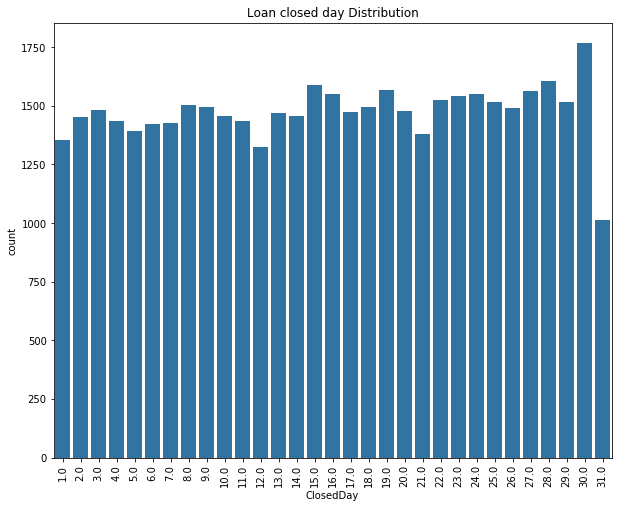

In [42]:
# create a bar chat to depict the distribution of Closed day

base_color = sb.color_palette()[0]
plt.figure(figsize = [10,8])
sb.countplot(data = loan_df, x = 'ClosedDay',
             color = base_color);
plt.xticks(rotation = 90)
plt.title('Loan closed day Distribution');  

More loans are also closed on the 30th of the month

### Question 5: How diverse are the occupations of the borrowers? Which occupation has the largest concentration of borrowers?

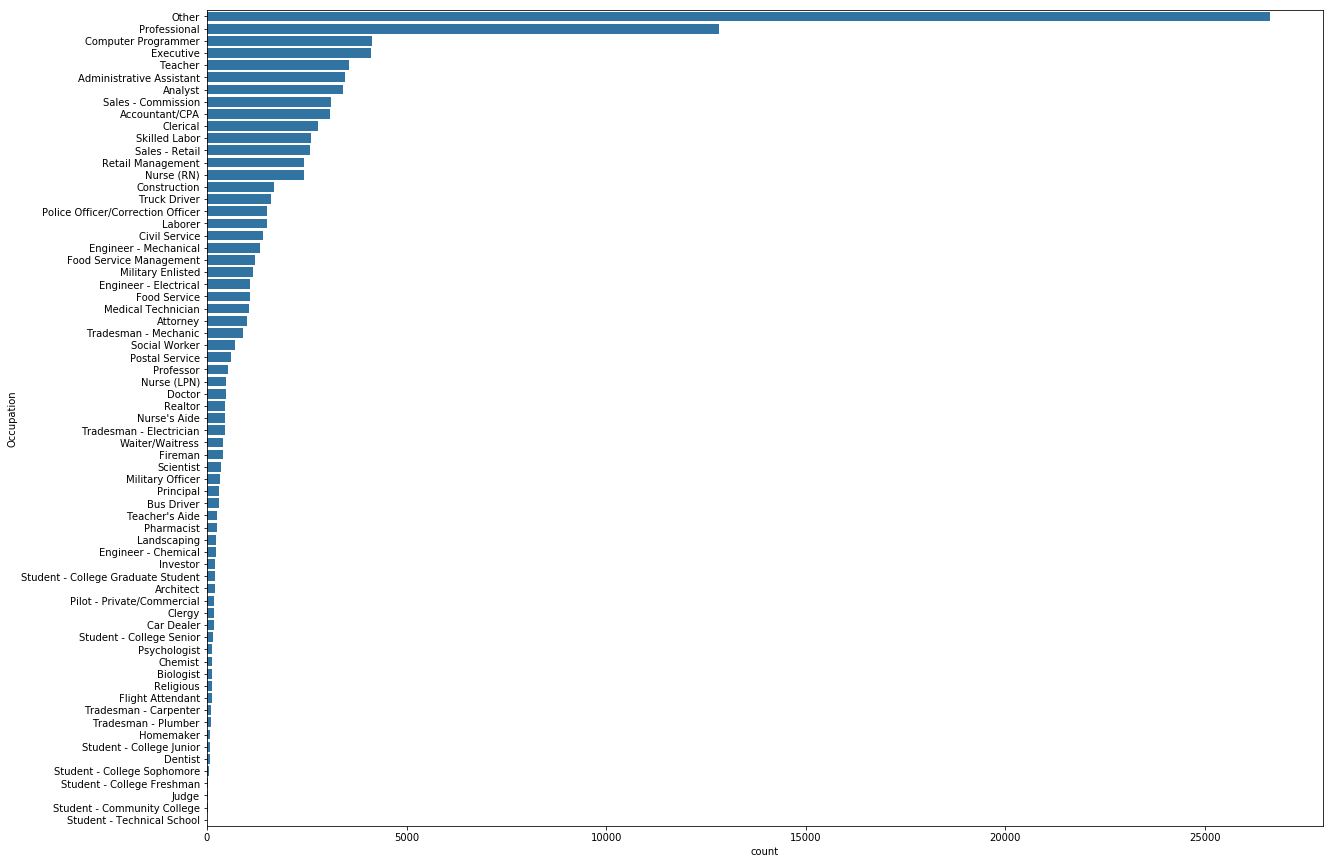

In [43]:
# plot bar chart
plt.figure(figsize = [20, 15])
base_color = sb.color_palette()[0]
order = loan_df['Occupation'].value_counts().index
sb.countplot(data = loan_df, y = 'Occupation' , color = base_color, order = order);

plt.xlabel('count');

The categories 'Others' and 'Professonal' were selected the most. This shows a low level of trust for the institution or paranoia by clients as they do not not want to disclose their real occupation.

### Question 6: Which state has the highest number of borrowers?

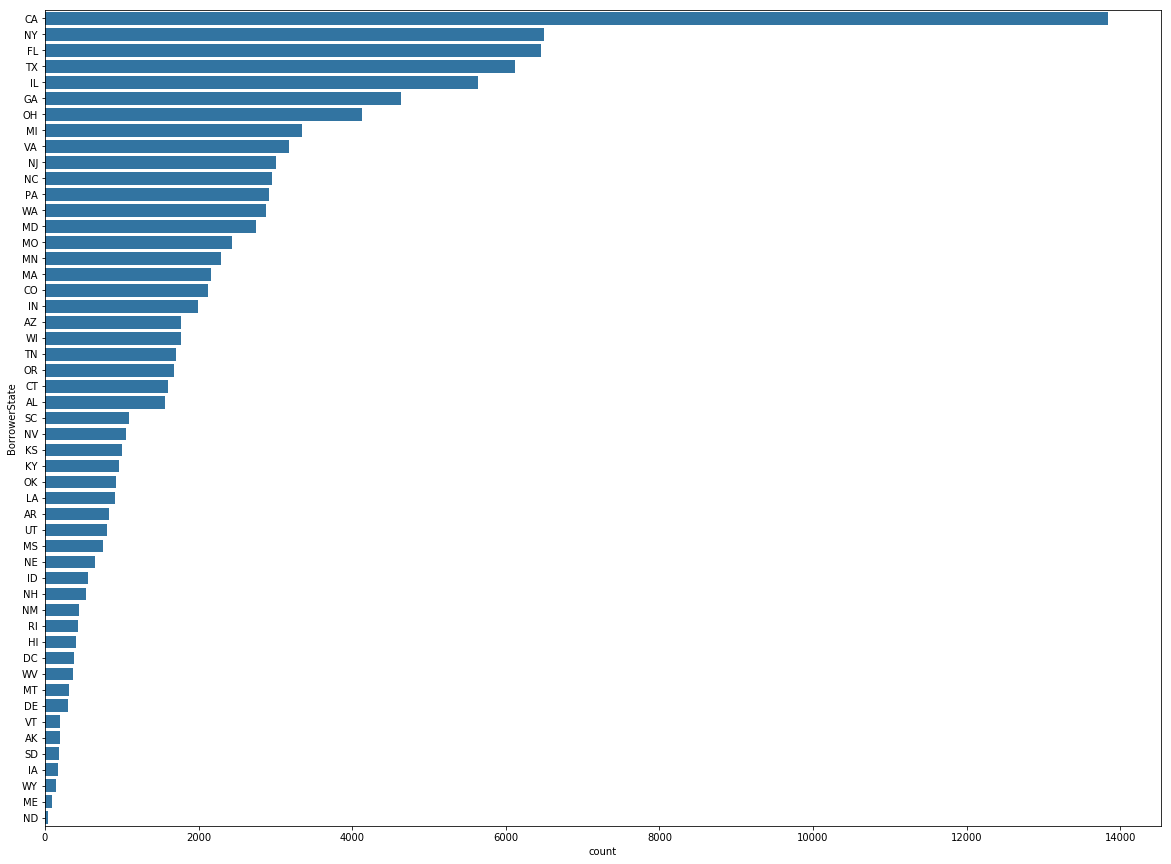

In [44]:
# plot bar chart
plt.figure(figsize = [20, 15])
base_color = sb.color_palette()[0]
order = loan_df['BorrowerState'].value_counts().index
sb.countplot(data = loan_df, y = 'BorrowerState', color = base_color, order = order);

plt.xlabel('count');


California takes the lead because the headquarter of Prosper leading organization is located in San Francisco. The company is also influencial in NewYork, Texas and Florida.

### Question 7: What are the borrowers income range?

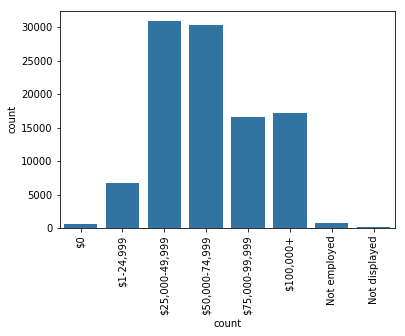

In [45]:
# plot bar chart

base_color = sb.color_palette()[0]
order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']
sb.countplot(data = loan_df, x = 'IncomeRange', color = base_color, order = order);
plt.xticks(rotation = 90)
plt.xlabel('count');

It is impossile for a lending institute to give money to people who do not earn or with no jobs. The clients might have intentionally or non-intentionally selecetd the wrong category. The highest category based on the data is 25000 - 49999 dollars and above. 

### Question 8: Distribution of Credit Score, Prosper Rating and Credit Grade?

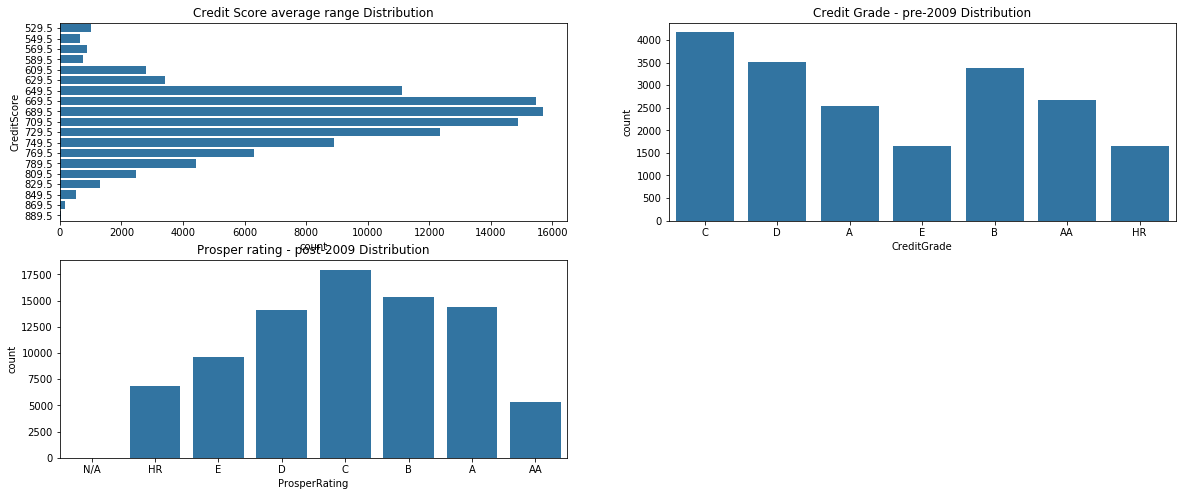

In [46]:
# create bar charts to depict the distributon of Credit Score Average range, Prosper Rating and Credit Grade
plt.figure(figsize = [20, 8])

plt.subplot(2,2,1)
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'CreditScore', color = base_color);

plt.title('Credit Score average range Distribution'); 

plt.subplot(2,2,2)
sb.countplot(data = loan_df, x = 'CreditGrade', color = base_color);

plt.title('Credit Grade - pre-2009 Distribution'); 

plt.subplot(2,2,3)
sb.countplot(data = loan_df, x = 'ProsperRating', color = base_color);

plt.title('Prosper rating - post-2009 Distribution'); 



This visualization reveals that borrowers with lower credit score are small in number, and same goes for those with high scores. This could be because people with high credit scores are financially stable and don't need loans, while people with low credit  scores most times do nnot get approvals for loans.

The same explanation is plausible for Credit Grade (pre- 2009) and Prosper rating (post-2009). 

### Question 9: Distributions of Borrower APR and Borrower Rate?

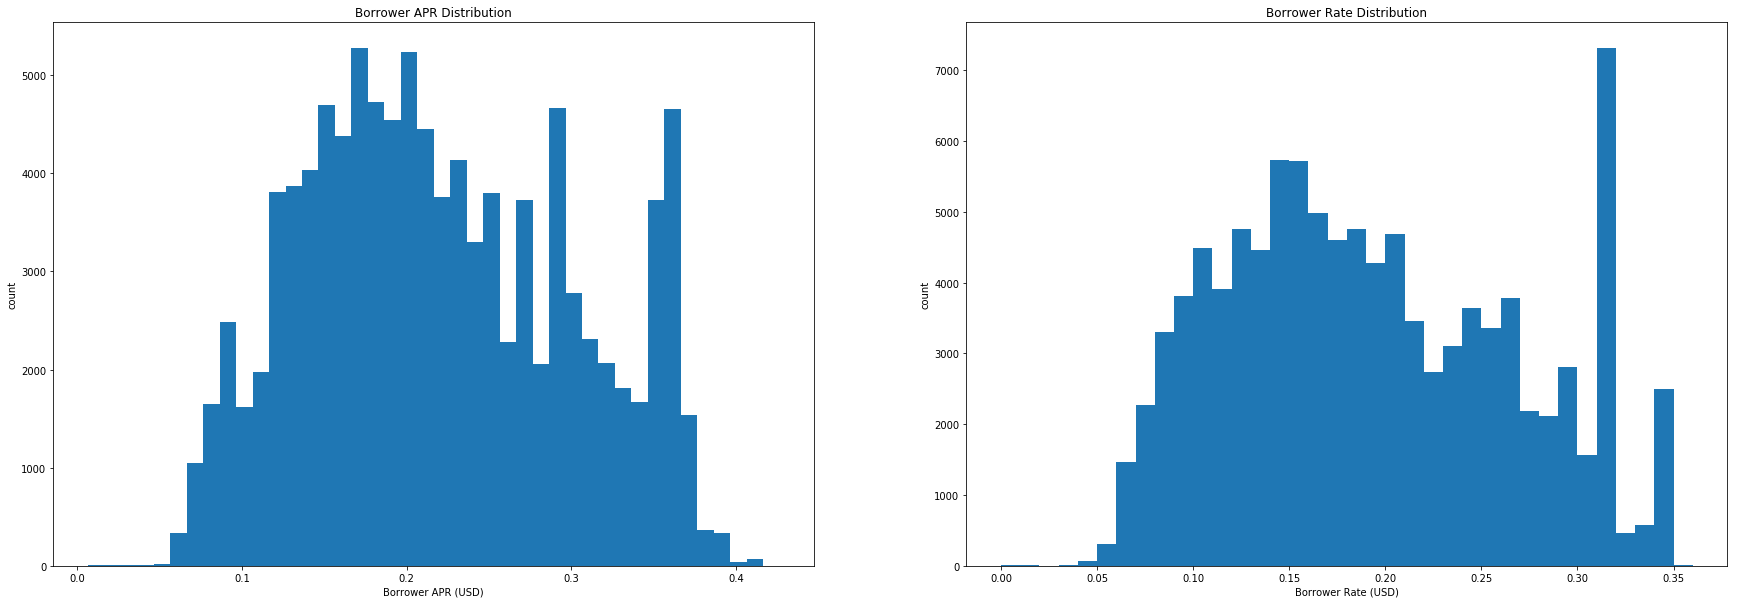

In [47]:
# set figure
plt.figure(figsize = [30, 10])

# left histogram
plt.subplot(1,2,1)
bins = np.arange(loan_df['BorrowerAPR'].min(), loan_df['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR (USD)')
plt.ylabel('count')
plt.title('Borrower APR Distribution');

# right histogram
plt.subplot(1,2,2)
bins = np.arange(loan_df['BorrowerRate'].min(), loan_df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate (USD)')
plt.ylabel('count')
plt.title('Borrower Rate Distribution');

The normal distribution of the Borrower APR and Borrower loan are similar with a slight difference. This is expected because Borrower APR is Borrower Rate plus fees. 

The peak of the bimodal Borrower APR histogram falls between 0.17 and 0.21, with spikes around loans with high risk, when compared to the credit score distribution. These spikes were however not prominent in the borrowers' rate histogram. This could be an indiaction of the increase in fees on due payments and charge offs.

### Question 10: Distribution of loan terms?

Text(0.5,1,'Loans term Distribution')

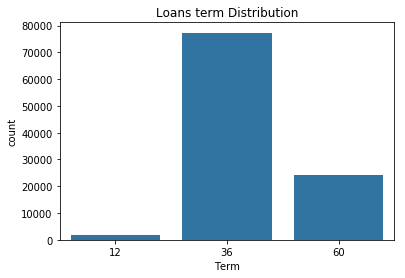

In [48]:
# create a bar chat to depict the distributon of loan terms 

base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, x = 'Term', color = base_color);

plt.title('Loans term Distribution')  

The above barchart shows that the term for the loans are between one year, three years and five years. Majority of the loans however have a time range of three years.

### Question 11: Distributions of Debt to income ratio?

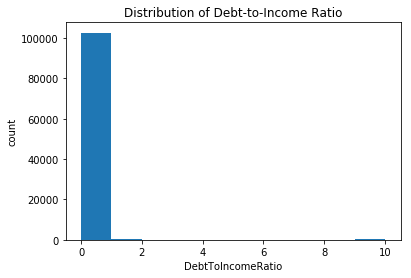

In [49]:
# create histogram to show the distribution of DebtToIncomeRatio

bins = np.arange(loan_df['DebtToIncomeRatio'].min(), loan_df['DebtToIncomeRatio'].max(), 0.1)
plt.hist(data = loan_df, x = 'DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('count')
plt.title('Distribution of Debt-to-Income Ratio');

The histogram shows a right skewneess which depicts that majority of the customers have a low debt-to-income ratio (i.e less than 1). 

### Question 12: Distributions of current delinquencies?

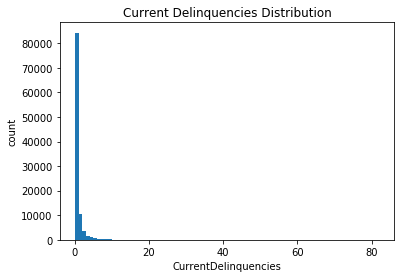

In [50]:
# create histogram to show the distribution of delinquencies

bins = np.arange(0, loan_df['CurrentDelinquencies'].max(), 1.0)
plt.hist(data = loan_df, x = 'CurrentDelinquencies', bins = bins)
plt.xlabel('CurrentDelinquencies')
plt.ylabel('count')
plt.title('Current Delinquencies Distribution');

Based on the first visualization of current delinquencies with right skewness, majority of the customers have between 0 delinquencies. 

### Question 13: What is the status of the loans?

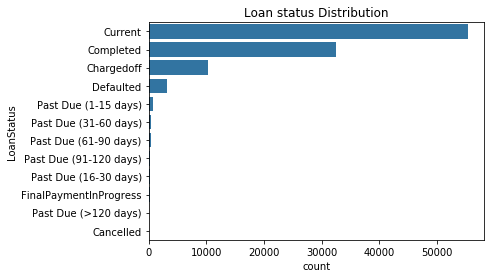

In [51]:
# create a bar chat to depict the distributon of loan status

order = loan_df['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = loan_df, y = 'LoanStatus', color = base_color, order = order)

plt.title('Loan status Distribution'); 

Based on the prosper dataset, majority of the loans are either completed or currently running. About 56000 loans are currently running, therefore showing the growth of the company. Other features include charged off, defaulted, cancelled etc.

### Question 14: Why do the customers take loans?

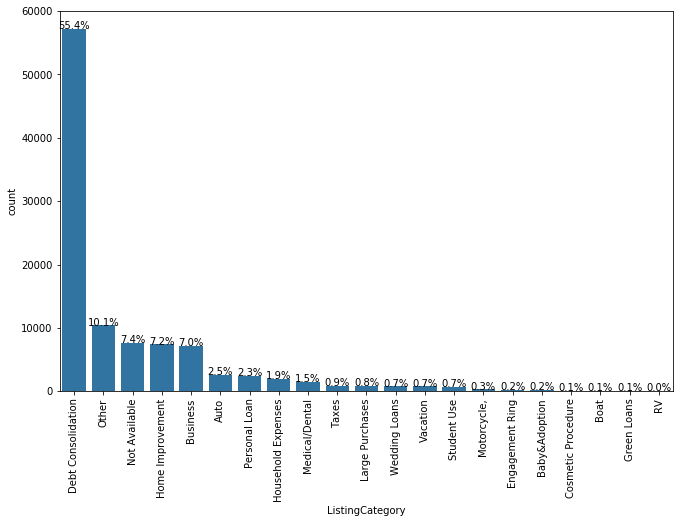

In [52]:
# plot bar chart with the percentage frequency annotated at the top of all bars.
plt.figure(figsize = (11, 7))
order = loan_df['ListingCategory'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df, x='ListingCategory', color=base_color, order=order);



type_counts = loan_df['ListingCategory'].value_counts()

df_ListingCategory = loan_df['ListingCategory'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df_ListingCategory)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');
    


Many customers seem to apply for loans to pay off their debt.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Univariate exploration is an imporatant stepmin analyzing and identfying unusual distribution in a dataset. It is the bedrock of other form of analysis.
In this notebook, I explored univariate statistics and employed log transformation on the loan original amount variable to expose hidden details.

The result from the univariate exploration of variables of interest  in this analysis is describe below:

-  The distribution of the original loan amount revealed a histogram skewed to the right with spikes at 3500 - 4000, 10000 - 10500, 15000 - 15500, 20000 - 20500, and 25000 - 25500 dollars. There was however a need to apply logarithm transformation to normalize the distribution and reveal hidden points. This transormation further buttress the known fact that many of the loans issued are below 25000 dollars.

- The bimodal distribution of the Borrower APR shows a normal distribution with a peak between 0.17 and 0.21, and spikes around 0.30 and 0.37. The spikes could be an indication of the fees high risk borrowers are supposed to pay.

- Based on the distribution of the status of the loans, a larger percentage are either completed or currently running with the other features including charged off, defaulted, cancelled etc. having a smaller percentage.

- Most loans in the dataset were listed in 2013, followed by 2012 and the lowest number of loans were booked in 2009. This is same as the loan origination year. More visualization on the unusual dip in 2009 will be discussed later. 

- Many loans were closed in 2013. This is understandable because many loans originated in the same year.

- Clients seem to flux in towards the end of the month. This could be due to the companies attempt to meet their performance goals. January being a best selling month might be a result of people renewing their resolutions and making their financial goals. 

- It's unusual that the clients do not trust the company by withholding their personal information like Listing purpose, and giving wrong income range information. The company should look into improving their services to gain their clients' trust.

- It is understandable that California has the highest number of borrowers. This is largely because the headquarter of prosper is located in San Francisco, California. It is however good to see that the company is extending their tentacles into other states. There is a possibiliet that they would dominate in years to come.

- Borrowers with lower credit score are small in number, and same goes for those with high scores. This could be because people with high credit scores are financially stable and don't need loans, while people with low credit  scores most times do nnot get approvals for loans. This can also be observed in Credit grade and Prosper ratings.

- The growth of the prosper company is evident as most of the loans seem to still be ongoing. Aother observation is that most of the borrowers take loan for debt consolidation.

- Most of the loans booked are within a span of 36 months (3 years).

- Another observation is the low debt-to-income ratio, which equals 0.8, that majority of the borrowers have. Also, most of the borrowers of prosper loans have 0 current delinquiencies.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

A lot of pre-exploration wrangling was imbibed before the EDA. Examples include engineering of 9 new features extracted from the Loan origination date, loan listing date and closed date attributes, filling null columns in borrowers' APR and debt-to-income columns, replacing data in columns, creating a new column 'credit score', conversion to appropiate datatypes etc.

All these processes were employed to fully utiliaze the data and lleave no stone unturn.

## Bivariate Exploration



### Question 1: What is the performance trend of the loans over the years?

In [53]:
#wrangle loan origination quarter
loan_df['LoanOriginationQuarter'] = loan_df['LoanOriginationQuarter'].str.split(' ').str[0]

loan_df['LoanOriginationQuarter'] = loan_df['OriginationYear'].map(str) +  ' ' + loan_df['LoanOriginationQuarter'].map(str)
 

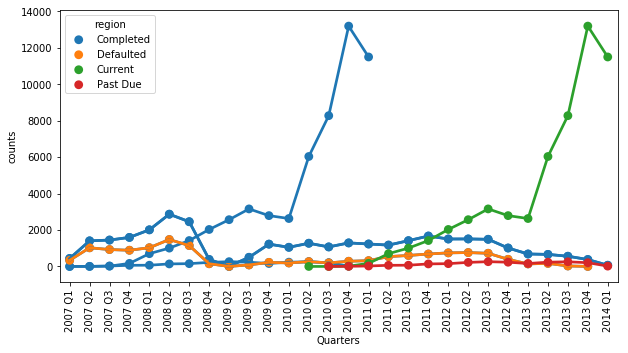

In [54]:
# create a time series for the loan origination year and quarter, using loan status as a hue


# wrangle loan status
loan_df["LoanStatus"]= loan_df["LoanStatus"].replace({"FinalPaymentInProgress": "Current", "Past Due (1-15 days)": "Past Due", 'Cancelled': 'Defaulted', 'Chargedoff' : 'Defaulted', 'Past Due (16-30 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due','Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due', 'Past Due (>120 days)': 'Past Due'})
df_1 = loan_df[loan_df['LoanStatus'] == 'Current']
df_2 = loan_df[loan_df['LoanStatus'] == 'Completed']
df_3 = loan_df[loan_df['LoanStatus'] == 'Defaulted']
df_4 = loan_df[loan_df['LoanStatus'] == 'Past Due']

df1 = df_1['LoanOriginationQuarter'].value_counts().rename_axis('Quarters').reset_index(name='counts').sort_values('Quarters')
df2 = df_2['LoanOriginationQuarter'].value_counts().rename_axis('Quarters').reset_index(name='counts').sort_values('Quarters')
df3 = df_3['LoanOriginationQuarter'].value_counts().rename_axis('Quarters').reset_index(name='counts').sort_values('Quarters')
df4 = df_4['LoanOriginationQuarter'].value_counts().rename_axis('Quarters').reset_index(name='counts').sort_values('Quarters')
figsize = [10,5]
f, ax = plt.subplots(1, 1, figsize=figsize)



x_col= 'Quarters'
y_col = 'counts'
sb.pointplot(ax=ax, x=x_col,y=y_col,data=df1)
sb.pointplot(ax=ax, x=x_col,y=y_col,data=df2)
sb.pointplot(ax=ax, x=x_col,y=y_col,data=df3)
sb.pointplot(ax=ax, x=x_col,y=y_col,data=df4)

df1['region'] = 'Current'
df2['region'] = 'Completed'
df3['region'] = 'Defaulted'
df4['region'] = 'Past Due'
df = pd.concat([df1,df2,df3, df4])
sb.pointplot(ax=ax,x=x_col,y=y_col,data=df.sort_values('Quarters'),hue='region', linestyles='-')
plt.tick_params(axis='x', rotation=90)

This chart shows the performance of the loans since their commencement. It is revealed that a large number of the loans requested are either completed or current with a low level of defaulted and past due loans. This chart reveals the productivity trend of the company over the years. The company also began to issue lots of loan in recent times. 

In [ ]:
# created a stacked bar chart for proper visualization
d = loan_df.groupby(['LoanOriginationQuarter','LoanStatus',]).size().unstack()
plt.figure(figsize = [10, 8])
d.plot(kind = 'bar', stacked = True, legend = True)
plt.ylabel('count')
plt.title('Relationship between Quarter and Loan status group');

It is also observed that there is a reduction in the number of defaulted loans in recent years.

### Question 2: Do the Credit scores of customers influence the risk rating of their loans?

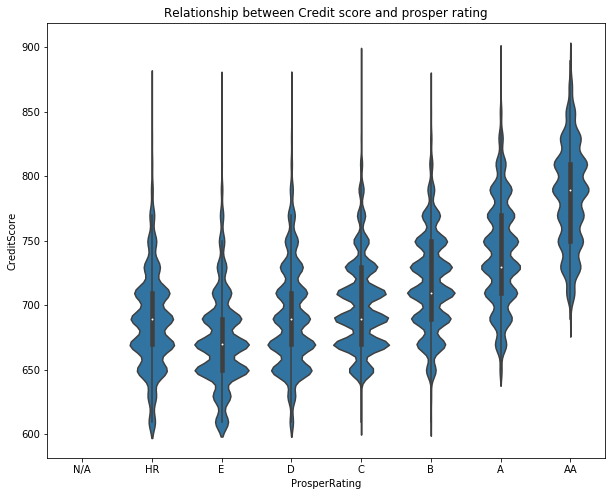

In [56]:
# create a violin plot
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 8])
sb.violinplot(data = loan_df, y = 'CreditScore', x = 'ProsperRating', color = base_color);

plt.title('Relationship between Credit score and prosper rating');

The plot above shows a quite strong negative correlation between credit score and prosper rating. One of the factors for the determination of a borrower's loan risk level is the credit score. The lesser the risk, the higher the credit score become. There is however a slight variation which shows the 'HR' hvaing a higher median than E. This could be a result of outliers that do not conform to the speculated relationship.

### Question 3: Which factor greatly influence the borrower's APR?

###### Borrower's APR vs Prosper Rating

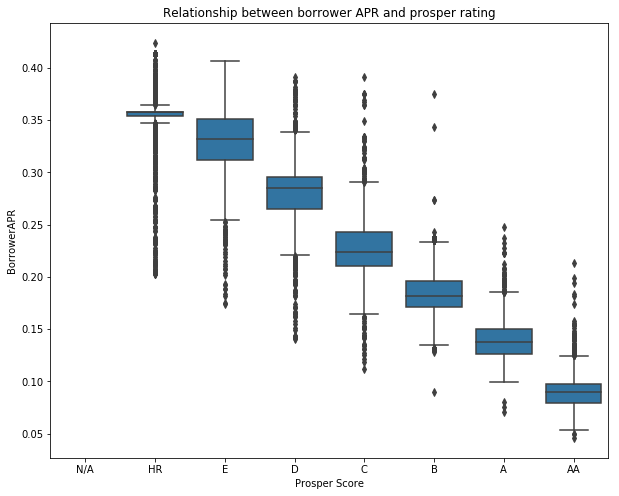

In [58]:
# create a box plot
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 8])
sb.boxplot(data = loan_df, y = 'BorrowerAPR', x = 'ProsperRating', color = base_color);
plt.xlabel('Prosper Score')
plt.title('Relationship between borrower APR and prosper rating');

A strong negative correlation can be observed form this visualization. It shows that lower prosper risk ratings attracts higher APR value and vice versa. The lowest risk ration 'AA' has a very low borrower APR while the highest rationg 'HR' have the highest borrower APR. 

### Question 4: How has the defaulted loans fare over time? 

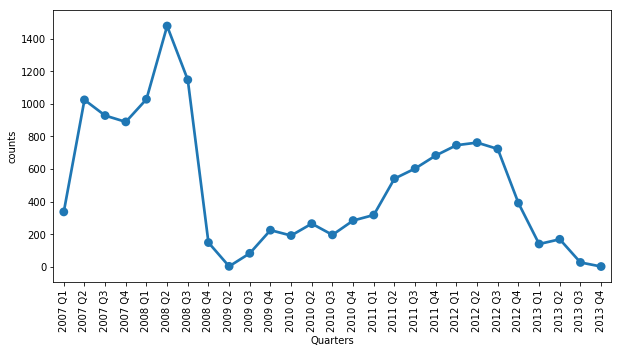

In [59]:
# creat time series
b = loan_df[loan_df['LoanStatus'] == 'Defaulted']

bb = b['LoanOriginationQuarter'].value_counts().rename_axis('Quarters').reset_index(name='counts').sort_values('Quarters')
figsize = [10,5]
f, ax = plt.subplots(1, 1, figsize=figsize)

x_col= 'Quarters'
y_col = 'counts'

sb.pointplot(ax=ax, x=x_col,y=y_col,data=bb)

plt.tick_params(axis='x', rotation=90)

The above line graph shows the default in loan payment over time. A drastic reduction in default payments is noticed between 2008 - 2009 as well as towards 2013. The reduction in 2013 is because most of the loans around the time are either current or final payment status.

### Question 5: How does the employment status affect the credit score? 

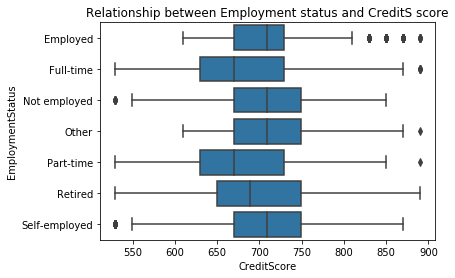

In [60]:
sb.boxplot(data = loan_df, y = 'EmploymentStatus', x = 'CreditScore', color = base_color)
plt.title('Relationship between Employment status and CreditS score');

Employed individuals have a higher credit score than unemployed people. Beinga member of a work space can greatly influence the amount of credit score alloted to a person.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The first bivariate visualization indicates the performance the performance of the loans since their commencement. It is revealed that a large number of the loans requested are either completed or current with a low level of defaulted and past due loans.  The company also began to issue lots of loan in recent times which signifies a high productivity. One unusual distribution is the absence of the 2009 quarter one. This is sure to be the cause of the dip in 2009 and indicates a 'pause period' where the company rebranded itself and raised the bar of crediting goals and visions.

> The violin plot shows a quite strong negative correlation between credit score and prosper rating. Low risk loans are received by high credit profile borrowers. There is however a slight variation which shows the 'HR' having a higher median than E. This is a result of outliers.

> The lowest risk ratio 'AA' has a very low borrower APR while the highest ratio 'HR' have the highest borrower APR. Therefore, it is safe to say low prosper risk ratings attracts higher APR value and vice versa. 

> The number of defaulted loans pre-revolution of the company is obviously higher than that of  post-revolution. This shows that the decision to revolutionize the company was a success. There is however a concerning observation of increased defaulted loan from 2012. This should be thoroughly checked.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Employed individuals have a higher credit score than unemployed people. Being a member of a work space can greatly influence the amount of credit score alloted to a person. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Exploration 1: DebtToIncome Ratio vs Borrower APR by Prosper Rating

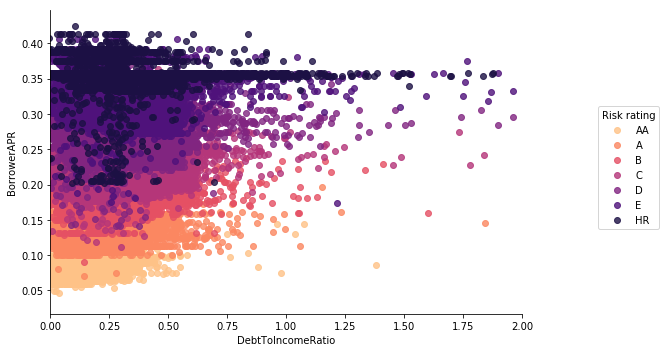

In [61]:
g = sb.FacetGrid(data = loan_df, hue = 'ProsperRating', hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],aspect = 1.5,palette =  'magma_r' , size = 5)
g.map(sb.regplot,'DebtToIncomeRatio', 'BorrowerAPR', fit_reg = False, x_jitter = 0.04)
g.set(xlim=(0, 2))
plt.legend(bbox_to_anchor=[1.15,0.7], title= 'Risk rating');

This is a scatter plot of the APR and debt to income ratio of the borrower, with the colors showcasing the various level of risk. I limited the x-values to allow for clearer visuals and better inferences.

One of the many observation from this visualization is the correlation between the loan risk levels and the APR values. Category 'AA' has a lower APR and as the risk gets higher, the APR gets larger. Also, majority of the clients have debt-to-income values below 1, without dependence on the the risk category. Another thing is that there is an horizontal cluster on data in the 'HR' category which extends past, into 1.5, unlike other category with sparse values around the 1.0+. 


### Exploration 2: LoanOriginalAmount vs Lender Yield by Prosper Rating and Loan Status

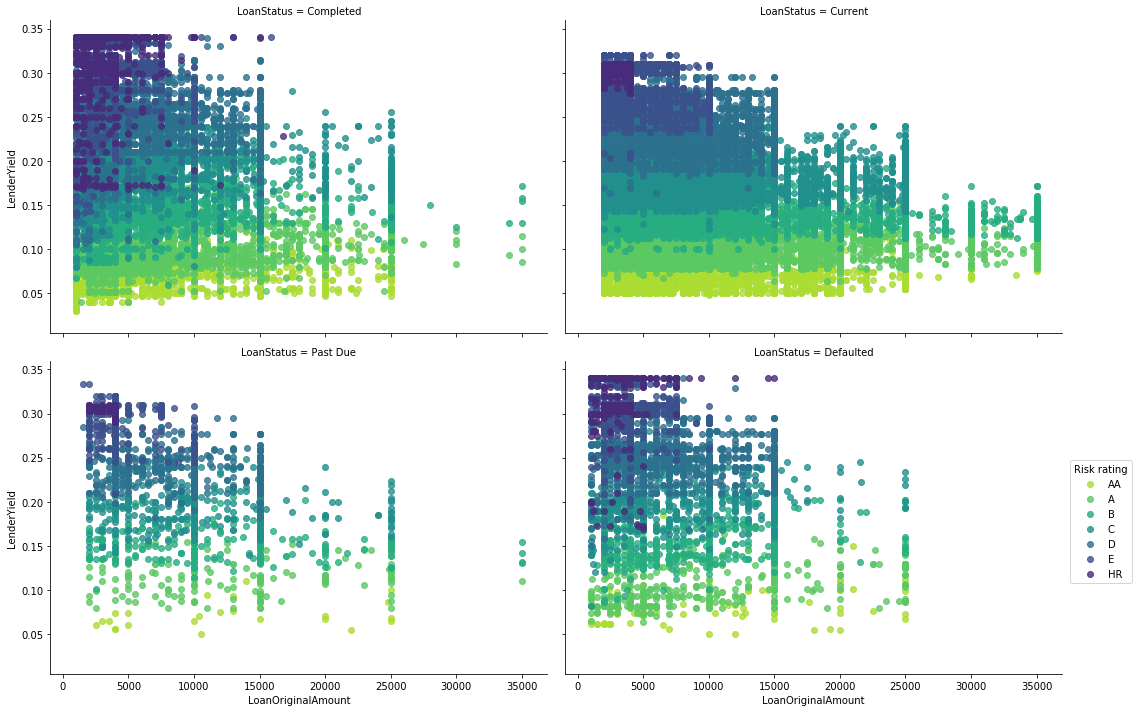

In [62]:
g = sb.FacetGrid(data = loan_df, col = 'LoanStatus', hue = 'ProsperRating', hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],aspect = 1.5,palette =  'viridis_r' , size = 5, col_wrap = 2)
g.map(sb.regplot, 'LoanOriginalAmount', 'LenderYield', fit_reg = False, x_jitter = 0.04)
plt.legend(bbox_to_anchor=[1.15,0.7], title= 'Risk rating');

This plot shows the relationship between loan original amount and lender yield by risk rating and loan status. Defaulted category only has loans of 25,000 dollars and below. There are not many loans above 25,000 dollars. This could be because borrowers with a riskier rating got approved for lower loan amounts, which makes sense considering the fact that they may be under heavy financial pressure. 
In the Current category,there are much more loans being taken past the 25,000 dollar mark and even past the 30,000 dollars mark and veering towards the maximum of 35000 dollars.
It is also observed that high risk loans  have a higher lender yield. This is understandable as borrowers with poor credit rating will have higher APR which return higher yields. 
The plot also shows that many defaulted loans are in the high risk category. This proves that the prosper rating system for loan approval is somewhat accurate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> One of the many strong relationships exposed by this EDA is the correlation between the loan risk levels and the APR values. Category 'AA' has a lower APR and as the risk gets higher, the APR gets larger. Majority of the clients have been observed to debt-to-income values below 1, with minimal dependence on the the risk category.  

> Defaulted category only has loans of 25,000 dollars and below. This shows that small amount of loans tend to default than larger amounts. There are however not many loans above 25,000 dollars. This could be because borrowers with a riskier rating got approved for lower loan amounts, which makes sense considering the fact that they may be under heavy financial pressure. 

> It is also observed that high risk loans have a higher lender yield. This is profitable for lenders, as borrowers with poor credit rating will have higher APR which return higher yields. The plot also shows that many defaulted loans are in the high risk category. This proves that the prosper rating system for loan approval is somewhat accurate.

### Were there any interesting or surprising interactions between features?

> A surprising interaction observed is that clients with debt-income ratio beyond 1.0 have higher loan risk rating, thereby resulting in higher borrower APR. Debt-to-income feature might be influencial in determining the prosper rating of a loan.

## Conclusions
> This project was somewhat challenging in a good way. It has helped me grasp a firm knowledge and skill in exploring exploratory data analysis using python. 

> Prosper is a peer - peer lending organisation that had been holding out well over the years. Their progress from the beginning has been nothing short inspirational. As a result, the prosper space is know for constant profitability. 

> The exploration of the data revealed the progessive trend of the company and the measure of success of all the models that were adopted over the time. The importance of a company having a defined objective and working plan cannot be overemphasized.

> This project shows that it is important to be mindful of value of credit scores as it is the measure of how high or low the interest rate an individual will pay. It also shows that there are several determinant of credit scores. In addition, this EDA comfirms the effectiveness of the prosper rating measurement system for loan issuance.